# http://downloads.hmpdacc.org/data/HMQCP/otu_table_psn_v35.txt.gz
    http://downloads.hmpdacc.org/data/HMQCP/v35_map_uniquebyPSN.txt.bz2
    
    Phyloseq tutorial where I found the links: http://joey711.github.io/phyloseq-demo/HMP_import_example.html,
    whoa you can actually get the sequence data too: http://downloads.hmpdacc.org/data/HMQCP/rep_set_v35.fna.gz
    
    https://www.hmpdacc.org/hmp/HMQCP/ - HMP QC files
    https://www.hmpdacc.org/hmp/HM16STR/ - HMP trimmed 16s data
    https://www.hmpdacc.org/hmp/HMMCP/ - HMP clinical production pilot data

# First load in abundances and map file

In [183]:
## READ the map file
import pandas as pd
df_hmp_map = pd.read_csv("/home/rachael/hmprawdata/abund/v35_map_uniquebyPSN.txt", header=0, delim_whitespace=True, dtype=str)
print(df_hmp_map.head())

   #SampleID       RSID visitno     sex RUNCENTER HMPbodysubsite Mislabeled  \
0  700013549  158013734       1  female       BCM          Stool        NaN   
1  700014386  158398106       1    male    BCM,BI          Stool        NaN   
2  700014403  158398106       1    male    BCM,BI         Saliva        NaN   
3  700014409  158398106       1    male    BCM,BI  Tongue_dorsum        NaN   
4  700014412  158398106       1    male    BCM,BI    Hard_palate        NaN   

  Contaminated                                        Description  
0          NaN  HMP_Human_metagenome_sample_700013549_from_sub...  
1          NaN  HMP_Human_metagenome_sample_700014386_from_sub...  
2          NaN  HMP_Human_metagenome_sample_700014403_from_sub...  
3          NaN  HMP_Human_metagenome_sample_700014409_from_sub...  
4          NaN  HMP_Human_metagenome_sample_700014412_from_sub...  


In [182]:
## READ the OTU file
nrows=1000
df_hmp_otu = pd.read_csv("/home/rachael/hmprawdata/abund/otu_table_psn_v35.txt", header=0, delim_whitespace=True, skiprows=1, nrows=nrows)
print(df_hmp_otu.iloc[:3])

         #OTU  ID  700114607  700114380  700114716  700114798  700114710  \
0    OTU_97.1   0          0          0          0          0          0   
1   OTU_97.10   0          0          0          0          0          0   
2  OTU_97.100   0          0          0          0          0          0   

   700114614  700114755  700114715   ...     700032036  700015970  700032180  \
0          0          0          0   ...             0          0          0   
1          0          0          1   ...             0          0          0   
2          0          0          0   ...             0          0          0   

   700015873  700016708  700016812  700016713  \
0          0          0          0          0   
1          0          0          0          0   
2          0          0          0          0   

                                           700016048  Consensus  Lineage  
0  Root;p__Firmicutes;c__Bacilli;o__Lactobacillal...        NaN      NaN  
1  Root;p__Proteobacteria;c

In [39]:
## Get data within the row number
df_hmp_map.loc[0]["HMPbodysubsite"]

'Stool'

In [40]:
len(df_hmp_map["HMPbodysubsite"])
print(set(df_hmp_map["HMPbodysubsite"]))

set(['Posterior_fornix', 'Mid_vagina', 'Hard_palate', 'Supragingival_plaque', 'Stool', 'Right_Antecubital_fossa', 'Saliva', 'Tongue_dorsum', 'Right_Retroauricular_crease', 'Anterior_nares', 'Palatine_Tonsils', 'Throat', 'Vaginal_introitus', 'Subgingival_plaque', 'Attached_Keratinized_gingiva', 'Buccal_mucosa', 'Left_Retroauricular_crease', 'Left_Antecubital_fossa'])


In [41]:
## Get data by row number 
## .loc is for fetching rows by column number
df_hmp_map.loc[1]

#SampleID                                                 700014386
RSID                                                      158398106
visitno                                                           1
sex                                                            male
RUNCENTER                                                    BCM,BI
HMPbodysubsite                                                Stool
Mislabeled                                                      NaN
Contaminated                                                    NaN
Description       HMP_Human_metagenome_sample_700014386_from_sub...
Name: 1, dtype: object

In [42]:
## locates rows for the specific bodysubsite
df_hmp_map["HMPbodysubsite"] == 'Buccal_mucosa'

0       False
1       False
2       False
3       False
4       False
5        True
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18       True
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
4827    False
4828     True
4829    False
4830    False
4831    False
4832    False
4833    False
4834    False
4835    False
4836    False
4837    False
4838    False
4839    False
4840    False
4841    False
4842     True
4843    False
4844    False
4845    False
4846    False
4847    False
4848    False
4849    False
4850    False
4851    False
4852     True
4853    False
4854    False
4855    False
4856    False
Name: HMPbodysubsite, Length: 4857, dtype: bool

In [38]:
## fetch the data of a specific bodysubsite
df_hmp_map[df_hmp_map["HMPbodysubsite"] == 'Buccal_mucosa']

,#SampleID,RSID,visitno,sex,RUNCENTER,HMPbodysubsite,Mislabeled,Contaminated,Description
5,700014415,158398106,1,male,"BCM,BI",Buccal_mucosa,NaN,NaN,HMP_Human_metagenome_sample_700014415_from_sub...
18,700014517,158418336,1,male,"BCM,BI",Buccal_mucosa,NaN,NaN,HMP_Human_metagenome_sample_700014517_from_sub...
34,700014607,158438567,1,male,"BCM,BI",Buccal_mucosa,NaN,NaN,HMP_Human_metagenome_sample_700014607_from_sub...
42,700014737,158458797,1,female,"BCM,BI",Buccal_mucosa,NaN,NaN,HMP_Human_metagenome_sample_700014737_from_sub...
56,700014787,158479027,1,male,"JCVI,BI",Buccal_mucosa,NaN,NaN,HMP_Human_metagenome_sample_700014787_from_sub...
71,700014913,158499257,1,male,"JCVI,BI",Buccal_mucosa,NaN,NaN,HMP_Human_metagenome_sample_700014913_from_sub...
85,700014977,158822939,1,male,"JCVI,WUGC",Buccal_mucosa,NaN,NaN,HMP_Human_metagenome_sample_700014977_from_sub...
99,700015072,158721788,1,male,"JCVI,BI",Buccal_mucosa,NaN,NaN,HMP_Human_metagenome_sample_700015072_from_sub...
113,700015137,158883629,1,female,"BCM,BI",Buccal_mucosa,NaN,NaN,HMP_Human_metagenome_sample_700015137_from_sub...
129,700015203,158742018,1,female,"BCM,BI",Buccal_mucosa,NaN,NaN,HMP_Human_metagenome_sample_700015203_from_sub...


In [125]:
## fetch the sample IDs of the specific body subsite
sampleID_buccalmucosa = df_hmp_map[df_hmp_map["HMPbodysubsite"] == 'Buccal_mucosa']['#SampleID']
print(sampleID_buccalmucosa)

5       700014415
18      700014517
34      700014607
42      700014737
56      700014787
71      700014913
85      700014977
99      700015072
113     700015137
129     700015203
145     700015269
162     700015434
167     700015444
193     700015645
207     700015726
223     700015865
238     700015946
258     700016040
279     700016127
298     700016303
312     700016348
322     700016381
332     700016464
345     700016550
358     700016632
373     700016700
393     700016788
408     700016910
419     700016984
428     700021284
          ...    
4421    700110652
4435    700110709
4448    700110762
4466    700110820
4483    700111034
4497    700111164
4515    700111230
4533    700111304
4551    700111447
4566    700111513
4581    700111582
4598    700111753
4615    700111819
4632    700111993
4651    700113018
4660    700113060
4672    700113106
4686    700113489
4707    700113555
4716    700113604
4729    700114005
4748    700114110
4766    700114172
4781    700114223
4793    70

In [126]:
## fetch the sample IDs of the specific body subsite
sampleID_midvagina = df_hmp_map[df_hmp_map["HMPbodysubsite"] == 'Mid_vagina']['#SampleID']
print(sampleID_midvagina)

51      700014773
123     700015173
139     700015239
179     700015456
188     700015574
216     700015762
274     700016056
339     700016499
352     700016562
467     700021900
480     700023068
492     700023176
518     700023244
545     700023397
562     700023454
607     700023641
633     700023708
651     700023822
669     700023879
691     700023974
711     700024041
730     700024135
758     700024241
794     700024356
896     700024739
920     700024806
929     700024853
1029    700032242
1047    700032336
1065    700032473
          ...    
3962    700108361
3995    700108550
4013    700108616
4075    700108974
4091    700109127
4124    700109250
4142    700109337
4160    700109403
4223    700109641
4283    700109941
4316    700110109
4334    700110175
4352    700110241
4370    700110307
4387    700110373
4460    700110774
4477    700110832
4509    700111176
4527    700111242
4545    700111316
4560    700111459
4592    700111594
4609    700111765
4626    700111831
4696    70

In [24]:
## Getting the first 10 rows of the OTU table
df_hmp_otu.iloc[:10]

,#OTU,ID,700114607,700114380,700114716,700114798,700114710,700114614,700114755,700114715,...,700032036,700015970,700032180,700015873,700016708,700016812,700016713,700016048,Consensus,Lineage
0,OTU_97.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Root;p__Firmicutes;c__Bacilli;o__Lactobacillal...,NaN,NaN
1,OTU_97.10,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,Root;p__Proteobacteria;c__Betaproteobacteria;o...,NaN,NaN
2,OTU_97.100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Root;p__Bacteroidetes;c__Bacteroidia;o__Bacter...,NaN,NaN
3,OTU_97.1000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Root;p__Proteobacteria;c__Betaproteobacteria;o...,NaN,NaN
4,OTU_97.10000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Root;p__Cyanobacteria;c__4C0d-2;o__YS2;f__;g__,NaN,NaN
5,OTU_97.10001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,Root;p__Actinobacteria;c__Actinobacteria;o__Ac...,NaN,NaN
6,OTU_97.10002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Root;p__Proteobacteria;c__Betaproteobacteria;o...,NaN,NaN
7,OTU_97.10003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Root;p__Bacteroidetes;c__Bacteroidia;o__Bacter...,NaN,NaN
8,OTU_97.10004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,Root;p__Firmicutes;c__Bacilli;o__Lactobacillal...,NaN,NaN
9,OTU_97.10005,0,1,5,0,0,0,0,3,0,...,0,0,0,0,0,0,0,Root;p__Bacteroidetes;c__Flavobacteria;o__Flav...,NaN,NaN


In [127]:
## I have a list of sample ids for bucal cavity and vagina and I want to extract the OTU
## abundances for each of them individually from the df_hmp_otu data frame. How do I do this?
## the most straightforward way is for loop

sampleID_midvagina = df_hmp_map[df_hmp_map["HMPbodysubsite"] == 'Mid_vagina']['#SampleID']
#print(sampleID_midvagina)
sampleID_midvagina = sampleID_midvagina[sampleID_midvagina != "700108361"]
df_hmp_otu[sampleID_midvagina]


,700014773,700015173,700015239,700015456,700015574,700015762,700016056,700016499,700016562,700021900,...,700111459,700111594,700111765,700111831,700113501,700113549,700114122,700114211,700114274,700114430
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [184]:
import pandas as pd
df_hmp_map = df_hmp_map = pd.read_csv("/home/rachael/hmprawdata/abund/v35_map_uniquebyPSN.txt", header=0, delim_whitespace=True, dtype=str)
samples_midvagina = df_hmp_map[df_hmp_map["HMPbodysubsite"] == 'Mid_vagina']


In [185]:
## Extracting Sample IDs for midvagina
nrows = 1000000000000
df_hmp_otu = pd.read_csv("/home/rachael/hmprawdata/abund/otu_table_psn_v35.txt", header=0, delim_whitespace=True, skiprows=1, nrows=nrows) 
sampleID_midvagina = df_hmp_map[df_hmp_map["HMPbodysubsite"] == 'Mid_vagina']['#SampleID']

In [186]:
## Extracting OTUs from specific humansubsite using sample ID
sampleID_midvagina = df_hmp_map[df_hmp_map["HMPbodysubsite"] == 'Mid_vagina']['#SampleID']
sampleID_midvagina = sampleID_midvagina[sampleID_midvagina != "700108361"]
df_midvagina_otu = df_hmp_otu[sampleID_midvagina]
print(df_midvagina_otu.shape)





(45383, 133)


In [187]:
## Series set intersection between female sample IDs set and buccal mucosa sample IDs set.
sampleID_female = df_hmp_map[df_hmp_map["sex"] == 'female']['#SampleID']
print(len(sampleID_female))
sampleID_buccalmucosa= df_hmp_map[df_hmp_map["HMPbodysubsite"] == 'Buccal_mucosa']['#SampleID']
sID_bm_female = pd.Series(list(set(sampleID_female).intersection(set(sampleID_buccalmucosa))))
print(len(sID_bm_female))
print(sID_bm_female)

2250
129
0      700098874
1      700015726
2      700097980
3      700024745
4      700099133
5      700035939
6      700105101
7      700106004
8      700103658
9      700101232
10     700113555
11     700015203
12     700108962
13     700032230
14     700114436
15     700023229
16     700105215
17     700106556
18     700105043
19     700100235
20     700096873
21     700023980
22     700024142
23     700097423
24     700110229
25     700110097
26     700033734
27     700033003
28     700105471
29     700099010
         ...    
99     700016303
100    700102121
101    700016550
102    700111753
103    700109115
104    700110820
105    700035643
106    700111819
107    700023060
108    700023184
109    700096598
110    700108103
111    700098437
112    700023647
113    700114280
114    700015434
115    700015444
116    700098940
117    700033138
118    700096708
119    700097008
120    700110295
121    700110762
122    700111582
123    700032324
124    700014737
125    700032644
126  

In [188]:
## Extracting OTUs from specific humansubsite using sample ID
## .shape = dimensions of the table
sampleID_buccalmucosa= df_hmp_map[df_hmp_map["HMPbodysubsite"] == 'Buccal_mucosa']['#SampleID']
df_buccalmucosa_otu = df_hmp_otu[sID_bm_female]
print(df_buccalmucosa_otu.shape)

(45383, 129)


In [189]:
##Writing dataframes into csv files
df_buccalmucosa_otu.to_csv('df_buccalmucosa_otu.csv')
df_midvagina_otu.to_csv('df_midvagina_otu.csv')

In [ ]:
SUMMARY STATISTICS OF OTU TABLES

In [173]:
 print(df_buccalmucosa_otu.shape)

(45383, 129)


In [175]:
print(df_midvagina_otu.shape)

(45383, 133)


In [177]:
## community size
midvagcom = df_midvagina_otu.sum(axis=0)
bucmuccom = df_buccalmucosa_otu.sum(axis=0)


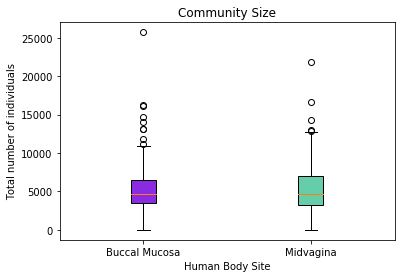

In [178]:
#boxplot of community size
complot = plt.boxplot([bucmuccom, midvagcom], patch_artist=True)
plt.xlabel("Human Body Site")
plt.xticks([1, 2], ['Buccal Mucosa', 'Midvagina'])
plt.ylabel("Total number of individuals")
plt.title("Community Size")
colors = ['blueviolet', 'mediumaquamarine']
for patch, color in zip(complot['boxes'], colors):
    patch.set_facecolor(color)
plt.savefig('/home/rachael/hmprawdata/abund/communitysize.png')

In [179]:
scipy.stats.ttest_ind(bucmuccom, midvagcom)

Ttest_indResult(statistic=0.4334995697111692, pvalue=0.6650113228249737)

In [180]:
print np.mean(bucmuccom)
print np.std(bucmuccom)

5452.782945736434
3594.056348773453


In [181]:
print np.mean(midvagcom)
print np.std(midvagcom)

5266.075187969925
3349.3684908620985


In [134]:
##Species richness for samples in df_buccalmucosa_otu
import numpy as np
buccalmucosarichness = np.count_nonzero(df_buccalmucosa_otu, axis=0)
print(buccalmucosarichness)

[1002  890  390  796  693  923 1133  712  185 1725  685 1020 1216  637
 1039 1685  603  413  678  997 1199  628  833  939  523  582 1436 1525
  628  744 2325  288 1384  445  722 1249  740 1583  948  691  528  644
 1108  777  593 1064  792 1114  811  536 1646  988  530 1283 1027  855
 1005  818 1011    1  947 1163  582 1004  707 1839  599    2  577 1075
  536  656  898  922  579  733  179 1104 1133  636  854  792 1603  801
  971  377  611  643  600  937  989  791  948  267  458 1010  350 1117
   13 1014  548 1425 1331  579 1023  679  478 1015  647  817  653 1047
 1266  808  784  992  800 1285  972  653    4 1814 1388  663 1024 1046
  650 1527  422]


In [135]:
##Species richness for samples in df_midvagina_otu
midvaginarichness = np.count_nonzero(df_midvagina_otu, axis=0)
print(midvaginarichness)


[ 582  274  520  355  588  320 1196  882  254  193  400  222  857  553
  196  265  509  387   74 1072  189  251  344  208   60  326  426  339
  240  235  225  342  769  991  391  318  575  410  510  568  576  283
 1011  392  454    2  447  167  604  491  586 1005  471  275  320  218
  328   26  699  277  470  359  326  399  488 1163  927  345  437  548
  376  230  202  349  364  152  212  958  458  238  390  822  153  334
   57  622   26  364  210  543 1313  260  388  309  158  561  402  922
  376   93  631  430  307  643  373  326  590  484  534  436  885  543
  617  201  524  266  344  285  611  536  515 1075 1190  304  674  915
  955  743  585 1217  851  692  594]


In [136]:
## average species richness and standard deviation of buccal mucosa
print("Buccal mucosa mean richness {}".format(np.mean(buccalmucosarichness)))
print("Buccal mucosa standard deviation richness {}".format(np.std(buccalmucosarichness)))
outfile = open("buccalrichness.txt", "w")
outfile.write("{} {}\n".format(np.mean(buccalmucosarichness),np.std(buccalmucosarichness)))


Buccal mucosa mean richness 862.96124031
Buccal mucosa standard deviation richness 391.680426671


In [137]:
## average species richness and standard deviation of midvagina
print("Midvagina mean richness {}".format(np.mean(midvaginarichness)))
print("Midvagina standard deviation {}".format(np.std(midvaginarichness)))
outfile = open("vaginarichness.txt", "w")
outfile.write("{} {}\n".format(np.mean(midvaginarichness),np.std(midvaginarichness)))


Midvagina mean richness 475.398496241
Midvagina standard deviation 278.734167151


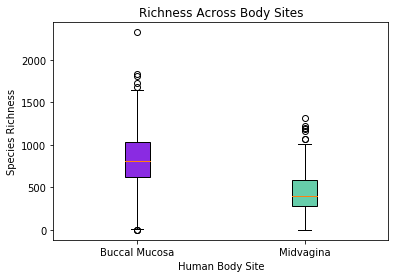

<Figure size 432x288 with 0 Axes>

In [118]:
## boxplot of species richness
import matplotlib.pyplot as plt
richplot = plt.boxplot([buccalmucosarichness, midvaginarichness], patch_artist=True)
plt.xlabel("Human Body Site")
plt.xticks([1, 2], ['Buccal Mucosa', 'Midvagina'])
plt.ylabel("Species Richness")
plt.title("Richness Across Body Sites")
colors = ['blueviolet', 'mediumaquamarine']
for patch, color in zip(richplot['boxes'], colors):
    patch.set_facecolor(color)
plt.show()
plt.savefig('/home/rachael/hmprawdata/abund/richness.png')

In [78]:
## two-sided t-test for comparing richness
import scipy.stats
scipy.stats.ttest_ind(buccalmucosarichness, midvaginarichness)

Ttest_indResult(statistic=9.213956036917603, pvalue=1.0975151319048424e-17)

In [79]:
## Shannon's diversity
#from skbio.diversity.alpha import shannon
#type(df_buccalmucosa_otu)
#shannon(df_buccalmucosa_otu, base=2)
import numpy as np
from pyentrp import entropy as ent
std_bc = np.std(df_buccalmucosa_otu)
print(ent.sample_entropy(df_buccalmucosa_otu, 4, 0.2 * std_bc))


KeyError: 0

In [80]:
## Calculating Shannon's Entropy of Buccal Mucosa
from scipy.stats import entropy
buccalmucosaentropy = entropy(df_buccalmucosa_otu)
print buccalmucosaentropy

[5.46711129 3.68556754 3.28309942 5.05482399 5.14378662 4.8641447
 4.6538563  4.57385743 3.90552351 5.39869624 4.71785432 4.50023062
 5.7350525  4.02233831 5.21014726 6.14712725 3.96882056 4.14456865
 4.47505545 5.70720114 4.606328   4.66896125 5.32251927 4.7696727
 5.96697843 4.50529536 4.52380945 5.20797085 3.8321745  4.66234647
 5.8355972  2.66190058 5.32960604 3.21009822 4.66100405 5.71931338
 5.60153596 6.10942638 5.62355096 4.0162163  3.85875229 3.84192893
 5.57217611 4.36142439 3.41591395 5.29988853 3.54233837 5.32212575
 5.40714608 3.43228505 5.53274467 4.73357177 3.97181062 5.34786532
 5.26310907 5.31364908 5.93376912 4.54009075 5.83855412 0.
 6.04375725 5.69106176 4.0956127  4.96677308 4.4525549  6.35973717
 4.22850863 0.69314718 4.82600974 5.26723024 4.45915525 5.11057944
 5.96160901 5.59944213 3.60502525 4.30350617 4.07010517 4.70474351
 5.71544603 4.11394682 5.05226615 4.82121787 5.78947853 6.18145547
 5.61559909 2.01029183 4.3093574  4.69003624 3.20005864 6.17506679
 4.94

In [81]:
## Calculated Shannon's Entropy for Midvagina
midvaginaentropy = entropy(df_midvagina_otu)
print midvaginaentropy

[4.41155306 3.02228986 3.64178865 3.96099888 3.70147195 3.82670717
 4.8724719  4.61029099 4.0409769  3.60827122 4.00361564 3.96800469
 4.69323279 4.04344278 3.08357283 3.63474673 4.12773728 3.28497257
 4.06950796 5.89918512 2.38776159 3.74104934 3.08083508 3.84736412
 3.68739578 3.10653023 3.85094957 3.8333724  3.25623276 3.15338122
 3.01055535 3.79165288 3.88362332 3.79732044 2.94507176 4.57514545
 3.54587736 3.9044341  5.80309382 4.3070671  4.16351567 3.20171458
 5.26602274 3.50798842 4.95973911 0.69314718 4.71692107 3.41715532
 4.36526584 3.67156841 4.16750349 6.15468095 3.16281885 4.47453067
 4.38383161 3.57731146 3.18070096 3.18945421 5.09596466 2.2293988
 4.16697383 4.74540918 3.63394118 2.62756468 4.4766915  5.03155686
 5.24478059 3.90953613 4.21425056 3.48715311 2.57565026 3.58448835
 2.7748497  4.26141138 3.15384755 3.23042329 4.01170588 5.92702978
 3.32908642 3.43287226 3.55580552 3.26376052 2.44497189 4.09599834
 3.80188872 4.73612606 2.17324014 4.18772011 1.81960099 4.14047

In [69]:
## Entropy mean and standard deviation
print("Buccal mucosa mean entropy {}".format(np.mean(buccalmucosaentropy)))
print("Buccal mucosa standard deviation entropy {}".format(np.std(buccalmucosaentropy)))
outfile = open("buccalshannon.txt", "w")
outfile.write("{} {}\n".format(np.mean(buccalmucosaentropy),np.std(buccalmucosaentropy)))


Buccal mucosa mean entropy 4.68236964843
Buccal mucosa standard deviation entropy 1.05582365784


In [70]:
print("Midvagina mean entropy {}".format(np.mean(midvaginaentropy)))
print("Midvagina standard deviation entropy {}".format(np.std(midvaginaentropy)))
outfile = open("vaginashannon.txt", "w")
outfile.write("{} {}\n".format(np.mean(midvaginaentropy),np.std(midvaginaentropy)))


Midvagina mean entropy 4.00363682666
Midvagina standard deviation entropy 1.00586645343


In [82]:
## two sided ttest for shannons entropy
#bmentropymean = np.mean(buccalmucosaentropy)
#midvaginamean = np.mean(midvaginaentropy)
scipy.stats.ttest_ind(buccalmucosaentropy, midvaginaentropy)

Ttest_indResult(statistic=5.308168314345395, pvalue=2.3750189606033712e-07)

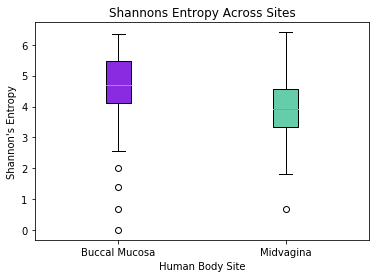

In [117]:
## Since Shannon's Entropy values are similar for midvagina and buccal mucosa
## given that shannon's entropy is a function of richness and abundance
## midvagina's abundance must compensate for having a much lower richness 
## meaning that midvagina should have a more even community than buccal mucosa
import matplotlib.pyplot as plt
shanplot = plt.boxplot([buccalmucosaentropy, midvaginaentropy], patch_artist=True)
plt.xlabel("Human Body Site")
plt.xticks([1, 2], ['Buccal Mucosa', 'Midvagina'])
plt.ylabel("Shannon's Entropy")
plt.title("Shannons Entropy Across Sites")
colors = ['blueviolet', 'mediumaquamarine']
for patch, color in zip(shanplot['boxes'], colors):
    patch.set_facecolor(color)
plt.savefig('/home/rachael/hmprawdata/abund/shannonentropy.png')

In [51]:
## Descriptive statistics of buccal mucosa
pd.DataFrame.describe(df_buccalmucosa_otu)

,700098874,700015726,700097980,700024745,700099133,700035939,700105101,700106004,700103658,700101232,...,700097008,700110295,700110762,700111582,700032324,700014737,700032644,700105625,700114601,700113489
count,45383.000000,45383.000000,45383.000000,45383.000000,45383.000000,45383.000000,45383.000000,45383.000000,45383.000000,45383.000000,...,45383.000000,45383.000000,45383.000000,45383.000000,45383.000000,45383.000000,45383.000000,45383.000000,45383.000000,45383.000000
mean,0.088183,0.213208,0.103475,0.099927,0.065796,0.111473,0.224555,0.107661,0.016592,0.290219,...,0.066875,0.000088,0.566776,0.143798,0.120155,0.246171,0.125179,0.068991,0.136262,0.152436
std,2.498394,17.808876,7.835932,3.380364,1.842909,4.990527,9.396890,5.750099,0.950617,8.976957,...,3.751838,0.009388,28.191887,2.997948,5.652903,8.656737,3.425427,2.054934,3.138003,12.320031
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,357.000000,3569.000000,1361.000000,459.000000,180.000000,894.000000,1187.000000,1133.000000,177.000000,1209.000000,...,751.000000,1.000000,4656.000000,451.000000,964.000000,1224.000000,432.000000,217.000000,396.000000,2434.000000


In [52]:
## Descriptive statistics of midvagina
pd.DataFrame.describe(df_midvagina_otu)

,700014773,700015173,700015239,700015456,700015574,700015762,700016056,700016499,700016562,700021900,...,700111459,700111594,700111765,700111831,700113501,700113549,700114122,700114211,700114274,700114430
count,45383.000000,45383.00000,45383.000000,45383.000000,45383.000000,45383.000000,45383.000000,45383.000000,45383.000000,45383.000000,...,45383.000000,45383.000000,45383.000000,45383.000000,45383.000000,45383.000000,45383.000000,45383.000000,45383.000000,45383.000000
mean,0.211401,0.18573,0.283498,0.178172,0.193597,0.160919,0.287398,0.250975,0.094485,0.019038,...,0.023775,0.027676,0.054051,0.065619,0.159090,0.056475,0.113765,0.119847,0.107199,0.031091
std,8.782821,18.02333,20.800781,8.288567,12.931886,7.686551,11.281845,10.552472,3.906900,1.468812,...,0.854587,0.353382,1.916302,1.222075,5.348886,2.161367,2.247645,2.090506,2.827132,0.484731
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1171.000000,3748.00000,4149.000000,1025.000000,2465.000000,1029.000000,1784.000000,1676.000000,457.000000,299.000000,...,109.000000,30.000000,383.000000,113.000000,616.000000,327.000000,233.000000,139.000000,247.000000,48.000000


BETA DIVERSITY

In [116]:
## Defining the function for Bray-Curtis Dissimilarity
from skbio.stats.distance import DistanceMatrix
from numpy import zeros

def table_to_distances(table, pairwise_distance_fn):
    sample_ids = table.columns
    num_samples = len(sample_ids)
    data = zeros((num_samples, num_samples))
    for i, sample1_id in enumerate(sample_ids):
        for j, sample2_id in enumerate(sample_ids[:i]):
            data[i,j] = data[j,i] = pairwise_distance_fn(table, sample1_id, sample2_id)
    return DistanceMatrix(data, sample_ids)

In [86]:
## Bray-Curtis Dissimilarity for Buccal Mucosa
def bray_curtis_distance(table, sample1_id, sample2_id):
    numerator = 0
    denominator = 0
    sample1_counts = table[sample1_id]
    sample2_counts = table[sample2_id]
    for sample1_count, sample2_count in zip(sample1_counts, sample2_counts):
        numerator += abs(sample1_count - sample2_count)
        denominator += abs(sample1_count + sample2_count)
    return float(numerator) / denominator
bc_buccalmucosa = table_to_distances(df_buccalmucosa_otu, bray_curtis_distance)
print(bc_buccalmucosa)
outfile = open("buccalbc.txt", "w")
outfile.write()
              

129x129 distance matrix
IDs:
'700098874', '700015726', '700097980', '700024745', '700099133', '700035939', ...
Data:
[[0.         0.92338061 0.91883192 ... 0.8132623  0.80188494 0.9996337 ]
 [0.92338061 0.         0.77804063 ... 0.82119154 0.94388398 0.99975895]
 [0.91883192 0.77804063 0.         ... 0.64584132 0.93952206 0.99965559]
 ...
 [0.8132623  0.82119154 0.64584132 ... 0.         0.856146   0.99980098]
 [0.80188494 0.94388398 0.93952206 ... 0.856146   0.         0.99984735]
 [0.9996337  0.99975895 0.99965559 ... 0.99980098 0.99984735 0.        ]]


TypeError: function takes exactly 1 argument (0 given)

Ordination results:
	Method: Principal Coordinate Analysis (PCoA)
	Eigvals: 129
	Proportion explained: 129
	Features: N/A
	Samples: 129x129
	Biplot Scores: N/A
	Sample constraints: N/A
	Feature IDs: N/A
	Sample IDs: '700098874', '700015726', '700097980', '700024745', '700099133', '700035939', ...


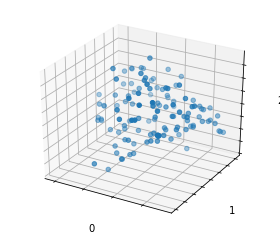

In [121]:
## pcoa for buccal mucosa bray-curtis dissimilariy
from skbio.stats.ordination import pcoa
bm_pc = pcoa(bc_buccalmucosa)
print bm_pc
fig = bm_pc.plot()

In [87]:
## Bray-Curtis Dissimilarity for midvagina
bc_midvagina = table_to_distances(df_midvagina_otu, bray_curtis_distance)
print(bc_midvagina)
outfile = open("midvaginabc.txt", "w")
outfile.write()

133x133 distance matrix
IDs:
'700014773', '700015173', '700015239', '700015456', '700015574', '700015762', ...
Data:
[[0.         0.99467347 0.9413179  ... 1.         0.99958503 1.        ]
 [0.99467347 0.         0.93660484 ... 0.99927892 0.99864601 1.        ]
 [0.9413179  0.93660484 0.         ... 0.99978148 0.99954881 0.99859915]
 ...
 [1.         0.99927892 0.99978148 ... 0.         0.97961957 1.        ]
 [0.99958503 0.99864601 0.99954881 ... 0.97961957 0.         0.9987253 ]
 [1.         1.         0.99859915 ... 1.         0.9987253  0.        ]]


TypeError: function takes exactly 1 argument (0 given)

In [ ]:
## pcoa plot for bray-curtis dissimilarity for midvagina
from skbio.stats.ordination import pcoa
mv_pc = pcoa(bc_midvagina)

In [ ]:
## histogram for midvagina bray-curtis dissimilarity

In [120]:
bc_midvagina129 = table_to_distances(df_midvagina_otu129, bray_curtis_distance)

In [122]:
## Mantel Test for bray-curtis dissimilarity between bodysites ??
from skbio.stats.distance import mantel
mantel(bc_buccalmucosa, bc_midvagina129, strict=False, method='pearson', permutations=999, alternative='two-sided')


ValueError: No matching IDs exist between the distance matrices.

In [90]:
## Defining the Bray-Curtis Dissimilarity between body sites function
def two_table_to_distances(table1, table2, pairwise_distance_fn):
    sample1_ids = table1.columns
    sample2_ids = table2.columns
    num1_samples = len(sample1_ids)
    num2_samples = len(sample2_ids)
    data = zeros((num1_samples, num2_samples))
    for i, sample1_id in enumerate(sample1_ids):
        for j, sample2_id in enumerate(sample2_ids[:i]):
            data[i,j] = data[j,i] = pairwise_distance_fn(table1, table2, sample1_id, sample2_id)
    return DistanceMatrix(data, sample1_ids)
def two_bray_curtis_distance(table1, table2, sample1_id, sample2_id):
    numerator = 0
    denominator = 0
    sample1_counts = table1[sample1_id]
    sample2_counts = table2[sample2_id]
    for sample1_count, sample2_count in zip(sample1_counts, sample2_counts):
        numerator += abs(sample1_count - sample2_count)
        denominator += sample1_count + sample2_count
    return float(numerator) / denominator

In [91]:
# create midvagina distance matrix with only 129 samples to match buccal mucosa
df_midvagina_otu129 = df_midvagina_otu.iloc[:,0:129]

In [92]:
## Bray-Curtis Dissimilarity between body sites
bc_bucmucmidvag = two_table_to_distances(df_buccalmucosa_otu, df_midvagina_otu129, two_bray_curtis_distance)
print(bc_bucmucmidvag)

129x129 distance matrix
IDs:
'700098874', '700015726', '700097980', '700024745', '700099133', '700035939', ...
Data:
[[0.         1.         1.         ... 0.99984283 1.         0.99963663]
 [1.         0.         0.99939048 ... 1.         0.99986314 0.99752395]
 [1.         0.99939048 0.         ... 0.99912484 0.99905512 0.99615851]
 ...
 [0.99984283 1.         0.99912484 ... 0.         0.9596158  0.99919159]
 [1.         0.99986314 0.99905512 ... 0.9596158  0.         0.99971707]
 [0.99963663 0.99752395 0.99615851 ... 0.99919159 0.99971707 0.        ]]


In [63]:
#PWMantel test for bray-curtis dissimilarity between both bodysites
from skbio.stats.distance import pwmantel
pwmantel(bc_bucmucmidvag, method='pearson', permutations=999, alternative='two-sided')


TypeError: object of type 'DistanceMatrix' has no len()

Ordination results:
	Method: Principal Coordinate Analysis (PCoA)
	Eigvals: 129
	Proportion explained: 129
	Features: N/A
	Samples: 129x129
	Biplot Scores: N/A
	Sample constraints: N/A
	Feature IDs: N/A
	Sample IDs: '700098874', '700015726', '700097980', '700024745', '700099133', '700035939', ...


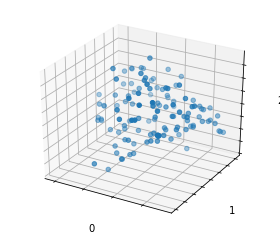

In [136]:
#pcoa plot for bray-curtis dissimilarity between bodysites
from skbio.stats.ordination import pcoa
bmmv_pc = pcoa(bc_bucmucmidvag)
print bmmv_pc

fig = bm_pc.plot()

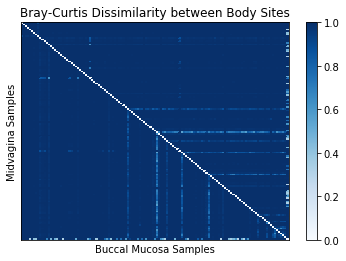

In [93]:
#graphing bray-curtis dissimilarity between bodysites
from skbio.stats.distance import DissimilarityMatrix
import matplotlib as mlt
import matplotlib.pyplot as plt
from matplotlib import axes
bc_bucmucmidvagmap = bc_bucmucmidvag.plot(cmap="Blues")
plt.xlabel('Buccal Mucosa Samples')
plt.ylabel('Midvagina Samples')
xticks = plt.xticks()
yticks = plt.yticks()
ax = plt.gca()
plt.xticks([])
plt.yticks([])
plt.title('Bray-Curtis Dissimilarity between Body Sites')
plt.savefig('/home/rachael/hmprawdata/abund/braycurtis.png')


In [90]:
bc_buccalmucosa.data[0]

array([0.        , 0.92338061, 0.91883192, 0.73761274, 0.8548941 ,
       0.77861163, 0.80835623, 0.90189019, 1.        , 0.81459267,
       0.74500123, 0.88543814, 0.82330002, 0.8624358 , 0.80583784,
       0.78378906, 0.84732035, 0.73872379, 0.74626866, 0.77983173,
       0.74231913, 0.75108748, 0.73067131, 0.65814406, 0.92177369,
       0.78586366, 0.88770291, 0.83709508, 0.80505341, 0.86145715,
       0.90115387, 0.81331233, 0.84520538, 0.99855744, 0.71631206,
       0.6515719 , 0.83536776, 0.8154321 , 0.74349924, 0.81559724,
       0.80366016, 0.82598397, 0.72040452, 0.81045545, 0.75192404,
       0.78217135, 0.87355394, 0.78300361, 0.7748741 , 0.84103829,
       0.82857448, 0.79550961, 0.85888967, 0.78202345, 0.72449581,
       0.84868503, 0.80371812, 0.77492355, 0.7398269 , 0.99950037,
       0.8178263 , 0.61133201, 0.65318693, 0.80476774, 0.80442804,
       0.78214317, 0.72452209, 1.        , 0.87588601, 0.75738529,
       0.74884125, 0.85918627, 0.8242112 , 0.78361982, 0.81522

In [91]:
bc_midvagina.data[0]

array([0.        , 0.99467347, 0.9413179 , 0.94468326, 0.99717084,
       0.87098301, 0.95927022, 0.99961876, 0.7814436 , 0.99694014,
       1.        , 1.        , 0.73851157, 0.9959596 , 0.99629761,
       0.9907386 , 0.99764808, 1.        , 1.        , 0.9997505 ,
       1.        , 0.95957835, 0.68032557, 1.        , 0.9960857 ,
       0.6554012 , 0.99947886, 0.99942313, 0.99567068, 0.66496317,
       0.9964036 , 0.99078884, 0.99471374, 0.72082879, 0.99315355,
       0.83449603, 0.93515693, 0.67774577, 1.        , 0.99959148,
       0.72769409, 0.93430483, 0.96183828, 0.9953666 , 1.        ,
       1.        , 0.9864002 , 0.98688934, 0.90914319, 0.73472383,
       0.98889173, 1.        , 0.73696803, 0.75998863, 0.83680762,
       0.8625    , 0.94067167, 1.        , 0.93207547, 0.75360221,
       0.99985761, 0.86511464, 0.64283626, 0.72509545, 0.98156615,
       1.        , 1.        , 0.98991495, 0.99090842, 0.98471426,
       0.66832757, 0.99703348, 0.91279193, 0.71077891, 0.99701

In [92]:
bc_bucmucmidvag.data[0]

array([0.        , 1.        , 1.        , 1.        , 0.99984102,
       1.        , 1.        , 0.99972376, 0.91785058, 0.99920931,
       1.        , 0.99979657, 0.99985505, 1.        , 1.        ,
       0.99772612, 1.        , 1.        , 1.        , 0.99971492,
       0.99966102, 1.        , 1.        , 0.99954877, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.99984487, 1.        , 1.        , 1.        , 1.        ,
       0.9993057 , 1.        , 1.        , 0.99971613, 1.        ,
       1.        , 1.        , 0.99985711, 0.99986754, 1.        ,
       0.99985956, 1.        , 0.99970651, 0.99984543, 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.99985786,
       0.99941241, 0.99904237, 0.99985473, 0.99909998, 1.        ,
       0.99931793, 1.        , 1.        , 1.        , 1.        ,
       0.99988161, 1.        , 1.        , 1.        , 0.99986788,
       1.        , 1.        , 1.        , 1.        , 1.     